In [43]:
import pandas as pd
import re

from sklearn.decomposition import PCA, TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
# from sklearn.semi_supervised import LabelSpreading
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVR, SVC
from sklearn.cluster import DBSCAN
from sklearn.metrics import jaccard_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
from pymystem3 import Mystem
nltk.download('wordnet')
# from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
!pip install deeppavlov

^C


In [ ]:
!python3 -m deeppavlov install levenshtein_corrector_ru

In [15]:
from deeppavlov import build_model, configs

CONFIG_PATH = configs.spelling_correction.levenshtein_corrector_ru

spellcheck_model = build_model(CONFIG_PATH, download=True)

2021-04-14 17:21:30.605 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/vocabs/russian_words_vocab.dict.gz download because of matching hashes
2021-04-14 17:21:44.601 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/lang_models/ru_wiyalen_no_punkt.arpa.binary.gz download because of matching hashes
[nltk_data] Downloading package punkt to /Users/crafterrr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
2021-04-14 17:

In [11]:
!pip install fastDamerauLevenshtein

  Stored in directory: /Users/crafterrr/Library/Caches/pip/wheels/4b/fd/b6/a9d6af68760233825060daf7f212dcaa8bf0b7429daab28477
Successfully built fastDamerauLevenshtein
You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from fastDamerauLevenshtein import damerauLevenshtein

ModuleNotFoundError: No module named 'fastDamerauLevenshtein'

  Using cached deeppavlov-0.14.1-py3-none-any.whl (988 kB)
  Using cached overrides-2.7.0.tar.gz (4.5 kB)
  Using cached uvloop-0.14.0.tar.gz (2.0 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Daria\\AppData\\Local\\Temp\\pip-install-4mpk1umh\\uvloop\\setup.py'"'"'; __file__='"'"'C:\\Users\\Daria\\AppData\\Local\\Temp\\pip-install-4mpk1umh\\uvloop\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Daria\AppData\Local\Temp\pip-pip-egg-info-ni_gv4tb'
         cwd: C:\Users\Daria\AppData\Local\Temp\pip-install-4mpk1umh\uvloop\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Daria\AppData\Local\Temp\pip-install-4mpk1umh\uvloop\setup.py", line 15, in <module>
        raise RuntimeError('uvloop does not support Windows at the moment')
    RuntimeError: uvloop does not support 

In [6]:
# pulse = pd.read_csv("original_dataset_mk1.csv")

In [7]:
pulse

NameError: name 'pulse' is not defined

In [46]:
pulse = pd.read_csv("original_dataset_mk1.csv")
# pulse = pd.read_csv("external_dataset.csv")
pulse['label'] = pulse['y'].astype(int)
pulse['message'] = pulse['text']
pulse

,Unnamed: 0,text,y,label,message
0,0,Пиздабол ещё тот,1,1,Пиздабол ещё тот
1,1,"Заколебали кукарекать, скоро весь пульс будет ...",1,1,"Заколебали кукарекать, скоро весь пульс будет ..."
2,2,На деле собака сутулая,1,1,На деле собака сутулая
3,3,Пшнх от сюда тварь,1,1,Пшнх от сюда тварь
4,4,"плати за мое молчание клоп , сутки молчу 200 б...",1,1,"плати за мое молчание клоп , сутки молчу 200 б..."
...,...,...,...,...,...
34602,34602,"Тут не то, что ТА не работает, здравый смысл о...",0,0,"Тут не то, что ТА не работает, здравый смысл о..."
34603,34603,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...,0,0,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...
34604,34604,"Ахаха, тока щас заметил что за это гавно комис...",0,0,"Ахаха, тока щас заметил что за это гавно комис..."
34605,34605,"Я с Теслой месяц мучился с плечом , в итоге вс...",0,0,"Я с Теслой месяц мучился с плечом , в итоге вс..."


In [47]:
def prepare_preproc_and_features(pulse, pulse_data=False):

    mystem = Mystem()
    
    def remove_mentions(s: str):
        return ' '.join(i if not i.startswith('@') else 'юзернейм' for i in s.split(' '))


    def remove_stocks(s: str):
        if not pulse_data:
            return s
        return ' '.join(i if not i.startswith('{$') else 'стокнейм' for i in s.split(' '))


    def get_caps_feature(text):
        upper = re.sub('[^А-Я]+', '', text)
        return len(upper)


    def get_actions(text):
        return text.count('стокнейм')


    def get_mentions(text):
        return text.count('юзернейм')


    def text_preprocessing(text):
        if type(text) == str:
            text = re.sub(re.compile('<.*?>'), '', text)
            text = re.sub('[^A-Za-zА-Яа-я]+', ' ', text)
            text = text.lower()
        else: 
            text = ''
        return text

    
#     def spellcheck_message(s):
#         return spellcheck_model([s])[0]
    
#     def compare_messages(before, after):
#         return damerauLevenshtein(before, after, similarity=True)

    def lemmatizer(x):
        return " ".join(mystem.lemmatize(x)).strip()


    pronomens = {
        'pr1': ['я', 'мой', 'меня'],
        'pr2': ['ты', 'твой', 'тебя'],
        'pr3': ['себя'],
        'pr4': ['мы', 'наш', 'нас'],
        'pr5': ['вы', 'ваш', 'вас'],
        'pr6': ['он', 'она', 'они', 'оно', 'её', 'его', 'их']
    }

    def compute_pronomens(text):
        result = []
        words = text.split()
        for key in pronomens.keys():
            pr_count = 0
            for word in pronomens[key]:
                pr_count += text.count(word)
            result.append(pr_count)
        return result


    def count_words(text):
        return len(text.split())

    # Замена имён и акций, добавить замену ссылок и смайлов на их названия, подсчёт количества символов
    pulse['n_words'] = pulse['message'].apply(count_words)
    pulse['message'] = pulse['message'].apply(remove_mentions).apply(remove_stocks)

    pulse['caps_lock'] = pulse['message'].apply(get_caps_feature)
    pulse['mentions'] = pulse['message'].apply(get_mentions)
    pulse['actions'] = pulse['message'].apply(get_actions)
    # Добавить ссылки и смайлики

    # Удаление лишних символов и вычисление длины строки
    pulse['message'] = pulse['message'].apply(text_preprocessing)
    pulse['length'] = pulse['message'].str.len()

    
    pulse['message_no_spellcheck'] = pulse['message']
    # Исправление грамотности и сравнение грамотных сообщений с предыдущими
#     if pulse_data:
#         pulse['message'] = pulse['message'].apply(spellcheck_message)
        
#     pulse['message_grammar'] = pulse.apply(lambda x: compare_messages(x['message_no_spellcheck'], x['message']), axis=1)

    # Леммы
    pulse['message'] = pulse['message'].apply(lemmatizer)

    # Удалить пустые
    pulse = pulse[pulse['n_words'] != 0]

    # Подсчёт местоимений
    pr_features = pd.DataFrame(pulse['message'].apply(compute_pronomens).to_list(), columns=pronomens.keys())
    for feature in pr_features.columns:
        pulse[feature] = list(pr_features[feature])
    
    # Деление на количество слов нужных колонок
    columns = ['mentions', 'actions', 'pr1', 'pr2', 'pr3', 'pr4', 'pr5', 'pr6', 'caps_lock']
    for c in columns:
        pulse[c] = pulse[c] / pulse['n_words']
    
    return pulse


# processed_df = prepare_preproc_and_features(pulse, pulse_data=False)
# pulse_processed_df = prepare_preproc_and_features(pulse, pulse_data=True)

In [50]:
pulse_processed_df

,Unnamed: 0,Unnamed: 0.1,text,y,label,message,n_words,caps_lock,mentions,actions,length,message_no_spellcheck,message_grammar,pr1,pr2,pr3,pr4,pr5,pr6
0,0,0,Пиздабол ещё тот,1,1,пиздабол еще тот,3,0.333333,0.0,0.0,15,пиздабол ещ тот,0.937500,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,1,1,"Заколебали кукарекать, скоро весь пульс будет ...",1,1,заколебать кукарекать скоро весь пульс...,9,0.111111,0.0,0.0,67,заколебали кукарекать скоро весь пульс будет э...,0.985075,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,2,2,На деле собака сутулая,1,1,на дело собака сутулый,4,0.250000,0.0,0.0,22,на деле собака сутулая,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,3,3,Пшнх от сюда тварь,1,1,пшнх от сюда тварь,4,0.250000,0.0,0.0,18,пшнх от сюда тварь,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,4,4,"плати за мое молчание клоп , сутки молчу 200 б...",1,1,платить за мой молчание клоп сутки ...,10,0.000000,0.0,0.0,45,плати за мое молчание клоп сутки молчу баксов,1.000000,0.100000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34602,34602,34602,"Тут не то, что ТА не работает, здравый смысл о...",0,0,тут не то что тот не работать зд...,10,0.300000,0.0,0.0,54,тут не то что та не работает здравый смысл отс...,1.000000,0.000000,0.0,0.0,0.100000,0.100000,0.000000
34603,34603,34603,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...,0,0,я тоже в бак по верить когда он ...,12,0.166667,0.0,0.0,42,я тоже в бакс по верил когда он уже стоил,0.952381,0.083333,0.0,0.0,0.000000,0.000000,0.083333
34604,34604,34604,"Ахаха, тока щас заметил что за это гавно комис...",0,0,ахах ток мы замечать что за это ...,18,0.222222,0.0,0.0,109,ахаха тока щас заметил что за это гавно комисс...,0.972727,0.055556,0.0,0.0,0.055556,0.000000,0.055556
34605,34605,34605,"Я с Теслой месяц мучился с плечом , в итоге вс...",0,0,я с теплый месяц мучиться с плечо ...,21,0.095238,0.0,0.0,102,я с теслой месяц мучился с плечом в итоге все ...,0.990196,0.190476,0.0,0.0,0.000000,0.047619,0.000000


In [49]:
pulse_processed_df.to_csv('pulse_processed.csv')

In [9]:
processed_df[['message', 'label']].to_csv('processed_external_new.csv')

1. Построить простую модель
2. Попробовать прероцессинг
3. Поправить орфографию
4. Попробовать лемматизацию

In [8]:
pulse_processed_df = pd.read_csv("pulse_processed.csv")

In [9]:
pulse_processed_df = pulse_processed_df.dropna()

In [10]:
def test_model(model, X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    score = []
    roc_auc = []
    train_score = []
    train_roc_auc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        train_preds = model.predict(X_train)
        score.append(f1_score(y_test, preds))
        roc_auc.append(roc_auc_score(y_test, preds))
        train_score.append(f1_score(y_train, train_preds))
        train_roc_auc.append(roc_auc_score(y_train, train_preds))
        
    return score, roc_auc, train_score, train_roc_auc

In [11]:
df = pulse_processed_df

In [12]:
import numpy as np

In [22]:
def prepare_data(d, vectorizer):
    msg = vectorizer.fit_transform(d['message']).toarray()
    df_features = df.copy()
    df_features = df_features[['n_words', 'caps_lock', 'mentions', 'actions', 'length', 'pr1', 'pr2', 'pr3', 'pr4', 'pr5', 'pr6']]
    # 'message_grammar', 
    for i in range(msg.shape[1]):
        df_features['msg' + str(i)] = msg[:, i]
#     df_features = df_features.astype(float)
    return df_features

In [51]:
df

,Unnamed: 0,Unnamed: 0.1,text,y,label,message,n_words,caps_lock,mentions,actions,length,message_no_spellcheck,message_grammar,pr1,pr2,pr3,pr4,pr5,pr6
0,0,0,Пиздабол ещё тот,1,1,пиздабол еще тот,3,0.333333,0.0,0.0,15,пиздабол ещ тот,0.937500,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,1,1,"Заколебали кукарекать, скоро весь пульс будет ...",1,1,заколебать кукарекать скоро весь пульс...,9,0.111111,0.0,0.0,67,заколебали кукарекать скоро весь пульс будет э...,0.985075,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,2,2,На деле собака сутулая,1,1,на дело собака сутулый,4,0.250000,0.0,0.0,22,на деле собака сутулая,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,3,3,Пшнх от сюда тварь,1,1,пшнх от сюда тварь,4,0.250000,0.0,0.0,18,пшнх от сюда тварь,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,4,4,"плати за мое молчание клоп , сутки молчу 200 б...",1,1,платить за мой молчание клоп сутки ...,10,0.000000,0.0,0.0,45,плати за мое молчание клоп сутки молчу баксов,1.000000,0.100000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34602,34602,34602,"Тут не то, что ТА не работает, здравый смысл о...",0,0,тут не то что тот не работать зд...,10,0.300000,0.0,0.0,54,тут не то что та не работает здравый смысл отс...,1.000000,0.000000,0.0,0.0,0.100000,0.100000,0.000000
34603,34603,34603,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...,0,0,я тоже в бак по верить когда он ...,12,0.166667,0.0,0.0,42,я тоже в бакс по верил когда он уже стоил,0.952381,0.083333,0.0,0.0,0.000000,0.000000,0.083333
34604,34604,34604,"Ахаха, тока щас заметил что за это гавно комис...",0,0,ахах ток мы замечать что за это ...,18,0.222222,0.0,0.0,109,ахаха тока щас заметил что за это гавно комисс...,0.972727,0.055556,0.0,0.0,0.055556,0.000000,0.055556
34605,34605,34605,"Я с Теслой месяц мучился с плечом , в итоге вс...",0,0,я с теплый месяц мучиться с плечо ...,21,0.095238,0.0,0.0,102,я с теслой месяц мучился с плечом в итоге все ...,0.990196,0.190476,0.0,0.0,0.000000,0.047619,0.000000


In [14]:
def test_model_and_vec(model, vec, d, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    X = prepare_data(d, vec)
#     print(X.head())
    X = np.array(X)
    
#     print(X.shape)

    y = d['label'].astype(float).values
#     print(list(y))
    score = []
    roc_auc = []
    train_score = []
    train_roc_auc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        train_preds = model.predict(X_train)
        score.append(f1_score(y_test, preds))
        roc_auc.append(roc_auc_score(y_test, preds))
        train_score.append(f1_score(y_train, train_preds))
        train_roc_auc.append(roc_auc_score(y_train, train_preds))
        
    return score, roc_auc, train_score, train_roc_auc

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
for lr in [0.1, 1, 10]:
    print(test_model_and_vec(AdaBoostClassifier(n_estimators=50, learning_rate=lr),
                       TfidfVectorizer(max_features=30, stop_words=stopwords.words('russian')), df))

([0.0, 0.0, 0.0, 0.0, 0.0], [0.5, 0.5, 0.5, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0], [0.5, 0.5, 0.5, 0.5, 0.5])
([0.01652892561983471, 0.04032258064516129, 0.017021276595744678, 0.0502092050209205, 0.05907172995780591], [0.5035449353591723, 0.50984433854695, 0.5040124403343634, 0.512784370158925, 0.5152014673618156], [0.0736949846468782, 0.04943357363542739, 0.050052137643378514, 0.045081967213114756, 0.03549060542797494], [0.5191952314672832, 0.5125084675211521, 0.5127325906394516, 0.5112824387835606, 0.5087870131985932])
([0.06531660011409014, 0.06431505879019692, 0.0660171586447579, 0.06495726495726496, 0.06491103202846973], [0.5103108188882248, 0.5044557550307862, 0.5180520496669733, 0.5096369341102645, 0.5092634095323472], [0.06492951730029903, 0.0646417445482866, 0.06638310248300433, 0.06501922803019514, 0.06503080594038249], [0.5094128193635141, 0.506518247357215, 0.5203578499122185, 0.5095812633073101, 0.509674647939935])


In [54]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=100)
clf.fit(X, df['label'].astype(float).values)

C:\ProgramData\Anaconda3\envs\ysda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(max_iter=100, random_state=1)

In [58]:
tf = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('russian'))

In [59]:
X = prepare_data(df, tf)

In [56]:
f1_score(df['label'], clf.predict(X))

0.4647794601711653

In [60]:
clf = MLPClassifier(random_state=1, max_iter=100)
clf.fit(X, df['label'].astype(float).values)

C:\ProgramData\Anaconda3\envs\ysda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(max_iter=100, random_state=1)

In [86]:
def prepare_test_data(d, vectorizer):
    msg = vectorizer.transform(d['message']).toarray()
    print(msg.shape)
    df_features = d.copy()
    df_features = df_features[['n_words', 'caps_lock', 'mentions', 'actions', 'length', 'pr1', 'pr2', 'pr3', 'pr4', 'pr5', 'pr6']]
    for i in range(msg.shape[1]):
        df_features['msg' + str(i)] = msg[:, i]
    return df_features

In [85]:
X_test.columns

Index(['n_words', 'caps_lock', 'mentions', 'actions', 'length',
       'message_grammar', 'pr1', 'pr2', 'pr3', 'pr4',
       ...
       'msg990', 'msg991', 'msg992', 'msg993', 'msg994', 'msg995', 'msg996',
       'msg997', 'msg998', 'msg999'],
      dtype='object', length=1012)

In [84]:
X.columns

Index(['n_words', 'caps_lock', 'mentions', 'actions', 'length', 'pr1', 'pr2',
       'pr3', 'pr4', 'pr5',
       ...
       'msg990', 'msg991', 'msg992', 'msg993', 'msg994', 'msg995', 'msg996',
       'msg997', 'msg998', 'msg999'],
      dtype='object', length=1011)

In [87]:
test = pd.read_csv("pulse_processed_test.csv")
test = test.fillna("")

X_test = prepare_test_data(test, tf)
print(X_test.shape)
y = clf.predict(X_test)

(6170, 1000)
(6170, 1011)


In [91]:
test['toxic'] = y
test.to_csv('gcn1.csv')

In [24]:
text_clf = GaussianNB()

test_model_and_vec(text_clf, TfidfVectorizer(norm='l2', use_idf=True, stop_words=stopwords.words('russian')), df)

([0.23280423280423282,
  0.2357473035439137,
  0.21077283372365335,
  0.2198697068403909,
  0.194647201946472],
 [0.7660114273185477,
  0.7670219081994543,
  0.7274735190733445,
  0.7314328795992671,
  0.6970440444454928],
 [0.3820695433598659,
  0.38702840186519716,
  0.3764172335600907,
  0.3879328659443382,
  0.37602965403624383],
 [0.944905124757209,
  0.9459863284897837,
  0.9435022972619626,
  0.9461917746815585,
  0.9434089126293378])

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

text_clf = MultinomialNB(alpha=1)

test_model_and_vec(text_clf, TfidfVectorizer(norm='l2', use_idf=True, stop_words=stopwords.words('russian')), df)

([0.02586206896551724,
  0.017316017316017316,
  0.017391304347826087,
  0.017391304347826087,
  0.025974025974025976],
 [0.5065502183406113,
  0.5043112599966972,
  0.5043859649122807,
  0.5043859649122807,
  0.506578947368421],
 [0.025945945945945945,
  0.028077753779697626,
  0.03229278794402583,
  0.034408602150537634,
  0.028047464940668825],
 [0.5065602711395252,
  0.5071193866374589,
  0.5081959999628508,
  0.5087436450888091,
  0.5071007097109339])

In [39]:
from pprint import pprint as pp

In [42]:
models = [
    GaussianNB(),
#     KNeighborsClassifier(),
#     GradientBoostingClassifier(),
#     RandomForestClassifier(random_state=0),
#     LogisticRegression()
]
vecs = [
#     TfidfVectorizer(max_features=1000, stop_words=stopwords.words('russian')),
    TfidfVectorizer(max_features=4000, norm='l2', use_idf=True, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=100, norm='l2', use_idf=True, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=400, norm='l2', use_idf=True, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=600, norm='l2', use_idf=True, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=4000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=8000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=12000, stop_words=stopwords.words('russian')),
]

for v in vecs:
    for model in models:
        print('===============================')
        print('===============================')
        print('===============================')
        print('===============================')
        print(v, model)
        score, roc_auc, train_score, train_roc_auc = test_model_and_vec(model, v, df)
        pp(list(zip(score, train_score)))
        pp(list(zip(roc_auc, train_roc_auc)))
        

TfidfVectorizer(max_features=4000,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...]) GaussianNB()
[(0.20535714285714288, 0.30354468297553666),
 (0.21633554083885206, 0.3170138888888889),
 (0.20924943138741467, 0.3256643481362582),
 (0.22125181950509465, 0.31433981752453094),
 (0.20648078372268275, 0.32531623017993944)]
[(0.728312434582647, 0.9218399820708202),
 (0.7488587841185214, 0.9265249710507638),
 (0.731437794396345, 0.9293825408090844),
 (0.7590766472433885, 0.9256098016510402),
 (0.7285724676999537, 0.9292704792499346)]


In [30]:
models = [
#     GaussianNB(),
#     KNeighborsClassifier(),
#     GradientBoostingClassifier(),
#     RandomForestClassifier(random_state=0),
    RandomForestClassifier(criterion='entropy', n_jobs=-1)
#     LogisticRegression()
]
vecs = [
    TfidfVectorizer(max_features=1000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=4000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=8000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=12000, stop_words=stopwords.words('russian')),
]

for v in vecs:
    for model in models:
        print('===============================')
        print('===============================')
        print('===============================')
        print('===============================')
        print(v, model)
        score, roc_auc, train_score, train_roc_auc = test_model_and_vec(model, v, df)
        pp(list(zip(score, train_score)))
        pp(list(zip(roc_auc, train_roc_auc)))
        

TfidfVectorizer(max_features=1000,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...]) RandomForestClassifier(n_jobs=-1)
[(0.21221864951768488, 0.9623059866962306),
 (0.26168224299065423, 0.9660545353366722),
 (0.22857142857142856, 0.9656319290465633),
 (0.21262458471760798, 0.966740576496674),
 (0.2662337662337662, 0.9660922734852695)]
[(0.5683913138806161, 0.9754289634889555),
 (0.588295312463139, 0.9750571385074734),
 (0.5751374177262969, 0.9766253661792486),
 (0.5671125370575699, 0.977191688231732),
 (0.586998788994, 0.9755861067069068)]
TfidfVectorizer(max_features=1000,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
        

In [24]:
clf.cv_results_

{'mean_fit_time': array([ 43.15138979,  63.85568862, 106.96344376,  38.47137718,
         58.8028172 ,  62.94210825]),
 'std_fit_time': array([2.98111799, 2.89388121, 1.68843697, 0.84917034, 4.10973989,
        5.6629758 ]),
 'mean_score_time': array([0.52870736, 0.59727302, 0.57439876, 0.50002456, 0.46710553,
        0.24799123]),
 'std_score_time': array([0.01569388, 0.03377648, 0.11295477, 0.04012577, 0.10853171,
        0.06351297]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 5, 10, 3, 5, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'max_depth': 3},
  {'criterion': 'gini', 'max_depth': 5},
  {'criterion': 'gini', 'max_depth': 10},
  {'criterion': '

(array([660., 288., 103.,  36.,  18.,  10.,   6.,   8.,   7.,   5.]),
 array([  3. ,  47.7,  92.4, 137.1, 181.8, 226.5, 271.2, 315.9, 360.6,
        405.3, 450. ]),
 <BarContainer object of 10 artists>)

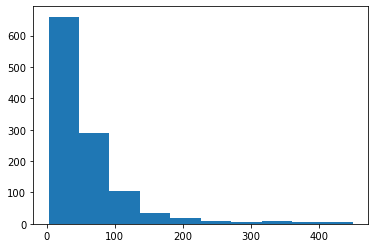

In [79]:
from matplotlib import pyplot as plt

plt.hist(pulse[pulse['label'] == 1]['mean_length'])

(array([ 8353., 10307.,  6139.,  3432.,  2129.,  1214.,   767.,   495.,
          366.,   264.]),
 array([  3. ,  52.7, 102.4, 152.1, 201.8, 251.5, 301.2, 350.9, 400.6,
        450.3, 500. ]),
 <BarContainer object of 10 artists>)

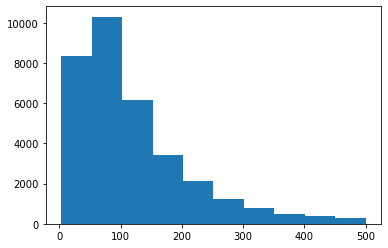

In [80]:
plt.hist(pulse[pulse['label'] == 0]['mean_length'])